# Librerias

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

# 1. Declarar Universos de discurso

In [8]:
angulo = ctrl.Antecedent(np.arange(-10, 10, 1), 'angulo')
velocidad = ctrl.Antecedent(np.arange(0, 1001, 1), 'velocidad')

posicion = ctrl.Consequent(np.arange(-5, 6, 1), 'posicion')

# 2. Construir los conjuntos borrosos para los Antecedentes

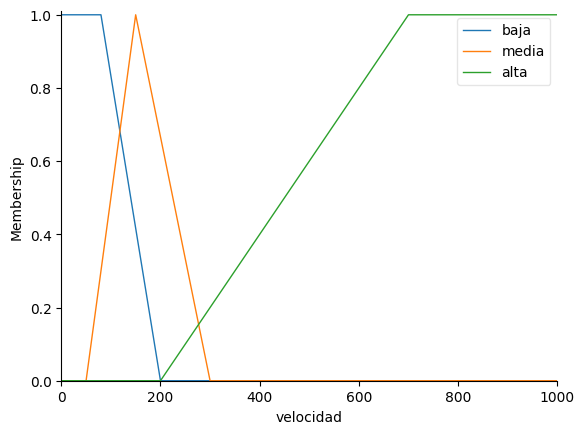

In [9]:
velocidad['baja'] = fuzz.trapmf(velocidad.universe, [0, 0, 80, 200])
velocidad['media'] = fuzz.trimf(velocidad.universe, [50, 150, 300])
velocidad['alta'] = fuzz.trapmf(velocidad.universe, [200, 700, 1000, 1000])

velocidad.view()
plt.show()

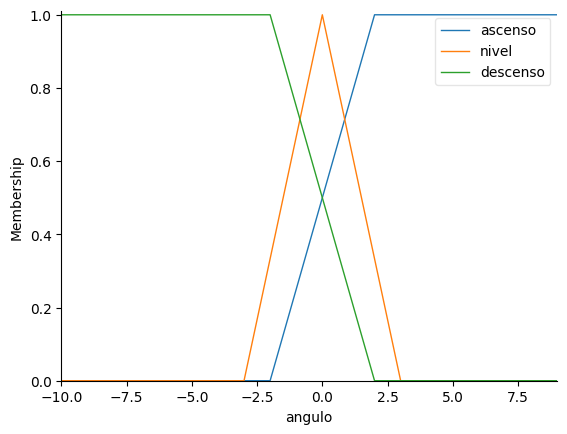

In [10]:
angulo['ascenso'] = fuzz.trapmf(angulo.universe, [-2, 2, 10,10])
angulo['nivel'] = fuzz.trimf(angulo.universe, [-3, 0, 3])
angulo['descenso'] = fuzz.trapmf(angulo.universe, [-10, -10,-2,2])

angulo.view()
plt.show()

# 3. Definir las funciones monotonas para el consecuente

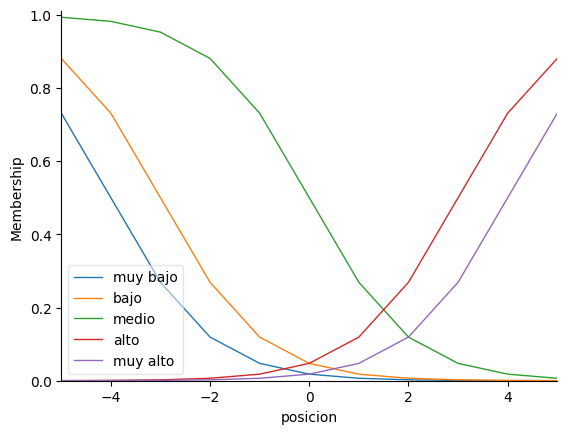

In [16]:
posicion['muy bajo'] = fuzz.sigmf(posicion.universe, -4, -1)
posicion['bajo'] = fuzz.sigmf(posicion.universe, -3, -1)
posicion['medio'] = fuzz.sigmf(posicion.universe, 0, -1)
posicion['alto'] = fuzz.sigmf(posicion.universe, 3, 1)
posicion['muy alto'] = fuzz.sigmf(posicion.universe, 4,1)

posicion.view()
plt.show()

# 4. Base del conocimiento

In [18]:
regla_1 = ctrl.Rule(velocidad['alta'] & angulo['ascenso'], posicion['muy alto'])
regla_2 = ctrl.Rule(velocidad['alta'] & angulo['nivel'], posicion['medio'])
regla_3 = ctrl.Rule(velocidad['alta'] & angulo['descenso'], posicion['muy bajo'])
regla_4 = ctrl.Rule(velocidad['media'] & angulo['ascenso'], posicion['alto'])
regla_5 = ctrl.Rule(velocidad['media'] & angulo['nivel'], posicion['medio'])
regla_6 = ctrl.Rule(velocidad['media'] & angulo['descenso'], posicion['bajo'])
regla_7 = ctrl.Rule(velocidad['baja'] & angulo['ascenso'], posicion['medio'])
regla_8 = ctrl.Rule(velocidad['baja'] & angulo['nivel'], posicion['medio'])
regla_9 = ctrl.Rule(velocidad['baja'] & angulo['descenso'], posicion['medio'])

# 5. Uso del motor de inferencia

In [21]:
control_vuelo = ctrl.ControlSystem([regla_1, regla_2, regla_3, regla_4, regla_5, regla_6, regla_7, regla_8, regla_9])

posicion_timon = ctrl.ControlSystemSimulation(control_vuelo)
posicion_timon.input['velocidad'] = 515
posicion_timon.input['angulo'] = -2.5
posicion_timon.compute()

posicion_timon.output['posicion']

np.float64(-2.1405390888211744)

# Reglas activadas

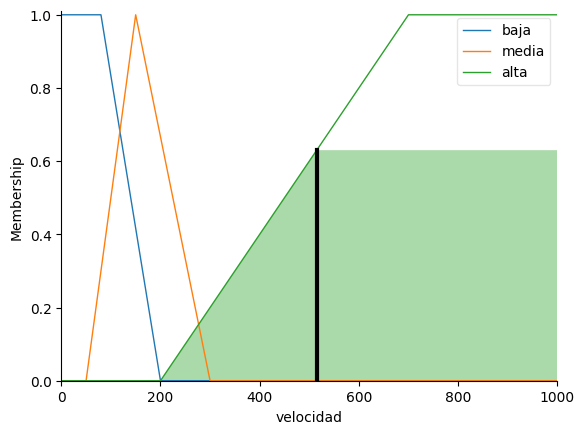

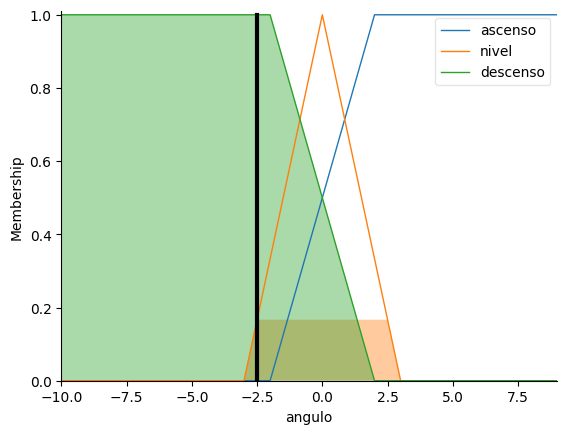

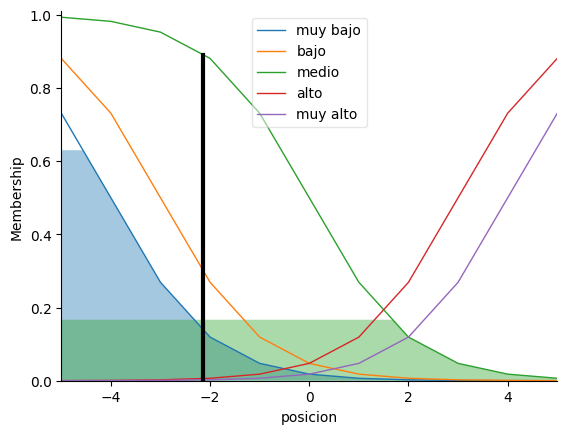

In [23]:
velocidad.view(sim=posicion_timon)
angulo.view(sim=posicion_timon)
posicion.view(sim=posicion_timon)